# Dog Cat Classifier Using CNN basis

## Installing neccessary packages

In [19]:
import os
import shutil
from keras import models
from keras import layers
from keras import optimizers
from IPython.display import display 
from PIL import Image

In [20]:
original_dataset_dir = r"C:\Users\rakes\Desktop\Rakesh\Deep Learning\cats_and_dogs_original_data"

base_dir = r"C:\Users\rakes\Desktop\Rakesh\Deep Learning\Deep Learning with Python - Francois Chollet\Ch-5\cats_dogs_small"

train_dir = os.path.join(base_dir,'train_dir')
# os.mkdir(train_dir)

train_cats_dir = os.path.join(train_dir,'cats')
# os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir,'dogs')
# os.mkdir(train_dogs_dir)

validation_dir = os.path.join(base_dir,'validation_dir')
# os.mkdir(validation_dir)

validation_cats_dir = os.path.join(validation_dir,'cats')
# os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir,'dogs')
# os.mkdir(validation_dogs_dir)

test_dir = os.path.join(base_dir,'test_dir')
# os.mkdir(test_dir)

test_cats_dir = os.path.join(test_dir,'cats')
# os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir,'dogs')
# os.mkdir(test_dogs_dir)

# Storing images to directories from large dataset of Kaggle (1000 training, 500 validation & 500 testing each for cats & dogs)

fnames = [f'cat.{i}.jpg' for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname)
    dst = os.path.join(train_cats_dir,fname)
    shutil.copy(src,dst)
    
fnames = [f'cat.{i}.jpg' for i in range(1000,1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname)
    dst = os.path.join(validation_cats_dir,fname)
    shutil.copy(src,dst)
    
fnames = [f'cat.{i}.jpg' for i in range(1500,2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname)
    dst = os.path.join(test_cats_dir,fname)
    shutil.copy(src,dst)

fnames = [f'dog.{i}.jpg' for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname)
    dst = os.path.join(train_dogs_dir,fname)
    shutil.copy(src,dst)
    
fnames = [f'dog.{i}.jpg' for i in range(1000,1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname)
    dst = os.path.join(validation_dogs_dir,fname)
    shutil.copy(src,dst)
    
fnames = [f'dog.{i}.jpg' for i in range(1500,2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname)
    dst = os.path.join(test_dogs_dir,fname)
    shutil.copy(src,dst)

In [21]:
# Training Set
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:',len(os.listdir(train_dogs_dir)))
print(" ")

# Test Set
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:',len(os.listdir(test_cats_dir)))
print(" ")

# Validation Set
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:',len(os.listdir(validation_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
 
total test cat images: 500
total test dog images: 500
 
total validation cat images: 500
total validation dog images: 500


In [22]:
test_cats_dir

'C:\\Users\\rakes\\Desktop\\Rakesh\\Deep Learning\\Deep Learning with Python - Francois Chollet\\Ch-5\\cats_dogs_small\\test_dir\\cats'

In [23]:
os.listdir(test_cats_dir)[0:4] 

['cat.1500.jpg', 'cat.1501.jpg', 'cat.1502.jpg', 'cat.1503.jpg']

## Training of the model

In [24]:
model = models.Sequential()

# conv_base layer
model.add(layers.Conv2D(32,(3,3), activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))

# fully dense layer
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

#Configuring the model
model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

In [25]:
validation_dir

'C:\\Users\\rakes\\Desktop\\Rakesh\\Deep Learning\\Deep Learning with Python - Francois Chollet\\Ch-5\\cats_dogs_small\\validation_dir'

In [26]:
validation_cats_dir

'C:\\Users\\rakes\\Desktop\\Rakesh\\Deep Learning\\Deep Learning with Python - Francois Chollet\\Ch-5\\cats_dogs_small\\validation_dir\\cats'

## Data Preprocessing

In [27]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
                                train_dir, target_size=(150,150),batch_size=20,class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
                                validation_dir,target_size=(150,150),batch_size=20,class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [28]:
for data_batch, label_batch in train_generator:
    print('data batch shape:',data_batch.shape)
    print('label batch shape:',label_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
label batch shape: (20,)


In [29]:
'''
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
'''

# history = model.fit_generator( train_generator, 
#             steps_per_epoch=100,
#             epochs=30,
#             validation_data= validation_generator,
#             validation_steps=50)

Epoch 1/30
100/100 [==============================] - 105s 1s/step - loss: 0.6909 - acc: 0.5415 - val_loss: 0.6988 - val_acc: 0.6130
Epoch 2/30
100/100 [==============================] - 68s 685ms/step - loss: 0.6623 - acc: 0.5990 - val_loss: 0.6315 - val_acc: 0.6270
Epoch 3/30
100/100 [==============================] - 67s 666ms/step - loss: 0.6197 - acc: 0.6570 - val_loss: 0.6465 - val_acc: 0.6420
Epoch 4/30
100/100 [==============================] - 68s 678ms/step - loss: 0.5676 - acc: 0.7050 - val_loss: 0.6141 - val_acc: 0.6280
Epoch 5/30
100/100 [==============================] - 70s 705ms/step - loss: 0.5367 - acc: 0.7230 - val_loss: 0.6362 - val_acc: 0.6790
Epoch 6/30
100/100 [==============================] - 70s 698ms/step - loss: 0.5045 - acc: 0.7595 - val_loss: 0.4842 - val_acc: 0.6970
Epoch 7/30
100/100 [==============================] - 70s 697ms/step - loss: 0.4813 - acc: 0.7575 - val_loss: 0.6338 - val_acc: 0.6910
Epoch 8/30
100/100 [==============================] - 70s

## Saving the model

In [30]:
# model.save('cats_and_dogs_small_1.h5')

In [31]:
from keras.models import load_model
model = load_model('cats_and_dogs_small_1.h5')

In [32]:
# Model Summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)      

## Displaying curves of loss and accuracy during training

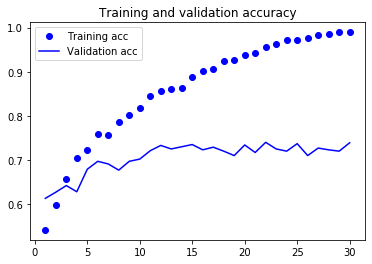

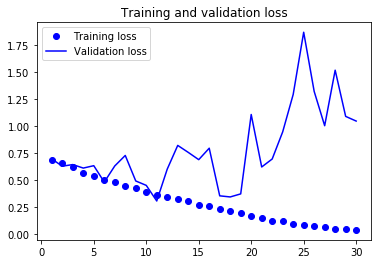

In [33]:
# import matplotlib.pyplot as plt

# acc = history.history['acc']
# val_acc = history.history['val_acc']
# loss = history.history['loss']
# val_loss = history.history['val_loss']

# epochs = range(1, len(acc) + 1)

# plt.plot(epochs, acc, 'bo', label='Training acc')
# plt.plot(epochs, val_acc, 'b', label='Validation acc')
# plt.title('Training and validation accuracy')
# plt.legend()

# plt.figure()

# plt.plot(epochs, loss, 'bo', label='Training loss')
# plt.plot(epochs, val_loss, 'b', label='Validation loss')
# plt.title('Training and validation loss')
# plt.legend()

# plt.show()

## Making new predictions by uploading a image from directory

In [10]:
import numpy as np
from keras.preprocessing import image
from keras.models import load_model

test_image = image.load_img('./beagle.png', target_size = (150,150))
test_image = image.img_to_array(test_image)
print(f' test_image shape : {test_image.shape}')

test_image = np.expand_dims(test_image, axis = 0)  # since our model input shape is (batch, h, w, ch) ---> here (1, h, w, ch)
model = load_model('cats_and_dogs_small_1.h5')
result = model.predict(test_image)

# Provide indices to each label
# train_generator.class_indices

if result[0][0] == 1:
    prediction = 'dog'
    print(f'The image is of a : {prediction}')
else:
    prediction = 'cat'
    print(f'The image is of a : {prediction}')

 test_image shape : (150, 150, 3)
The image is of a : cat


In [ ]:
print(f'train_generator.class_indices: {train_generator.class_indices}')

In [12]:
test_image = image.load_img('./beagle.png',  target_size = (150,150))
test_image = image.img_to_array(test_image)
test_image.shape

(150, 150, 3)

In [13]:
test_image = np.expand_dims(test_image, axis = 0)
test_image.shape

(1, 150, 150, 3)

# Part2:

# Using Data Augmentation - Tackling the shortage of the dataset

In [23]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rotation_range=40,
                            shear_range=0.20,
                            zoom_range=0.20,
                            width_shift_range=0.2,
                            height_shift_range=0.2,
                            horizontal_flip=True,
                            fill_mode='nearest')

<class 'PIL.Image.Image'>
(150, 150, 3)
(1, 150, 150, 3)


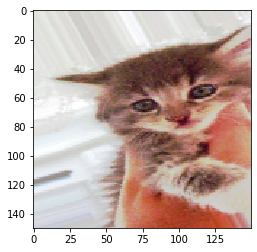

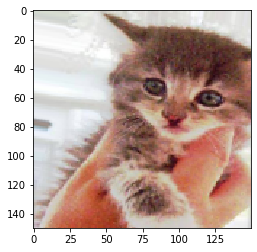

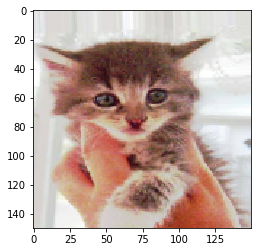

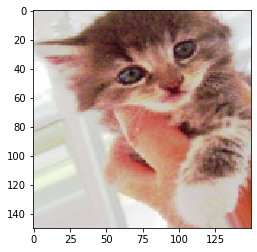

In [24]:
from keras.preprocessing import image                           
import matplotlib.pyplot as plt

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
img_path = fnames[3]                                            

img = image.load_img(img_path, target_size=(150, 150))          
print(type(img))

# Converting image to numpy array
x = image.img_to_array(img)                                     
print(x.shape)

# Reshape of the array
x = x.reshape((1,) + x.shape)   # this 2 represents batch_size = 1
print(x.shape)

i = 0                                                           
for batch in datagen.flow(x, batch_size=2):                     
    plt.figure(i)                                               
    imgplot = plt.imshow(image.array_to_img(batch[0]))          
    i += 1                                                      
    if i % 4 == 0:                                              
        break                                                   

plt.show()

## Implementing the Data Augmentation for our dataset

In [25]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [26]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator( rotation_range=40, 
                                    width_shift_range=0.20,
                                    height_shift_range=0.20,
                                    shear_range=0.20,
                                    zoom_range=0.20,
                                    fill_mode='nearest',
                                    horizontal_flip=True,
                                    vertical_flip=True,
                                    rescale= 1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

In [27]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),                                 
                                                    batch_size=40,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                 target_size=(150,150),batch_size=40,class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [28]:
for batch,labels in train_generator:
    print(batch.shape)
    print(labels.shape)
    break

(40, 150, 150, 3)
(40,)


In [29]:
history = model.fit(train_generator,
                    epochs=40,
                    validation_data=validation_generator,
                    steps_per_epoch=100,
                    validation_steps=50)

Epoch 1/40
100/100 [==============================] - 98s 985ms/step - loss: 0.6914 - acc: 0.5222 - val_loss: 0.6315 - val_acc: 0.5160
Epoch 2/40
100/100 [==============================] - 92s 924ms/step - loss: 0.6758 - acc: 0.5723 - val_loss: 0.6472 - val_acc: 0.5750
Epoch 3/40
100/100 [==============================] - 85s 855ms/step - loss: 0.6649 - acc: 0.5970 - val_loss: 0.5985 - val_acc: 0.6060
Epoch 4/40
100/100 [==============================] - 72s 724ms/step - loss: 0.6501 - acc: 0.6072 - val_loss: 0.6644 - val_acc: 0.5920
Epoch 5/40
100/100 [==============================] - 90s 899ms/step - loss: 0.6322 - acc: 0.6285 - val_loss: 0.5380 - val_acc: 0.6400
Epoch 6/40
100/100 [==============================] - 80s 801ms/step - loss: 0.6221 - acc: 0.6363 - val_loss: 0.5076 - val_acc: 0.6770
Epoch 7/40
100/100 [==============================] - 100s 1s/step - loss: 0.6080 - acc: 0.6658 - val_loss: 0.5419 - val_acc: 0.6950
Epoch 8/40
100/100 [==============================] - 85s

In [30]:
model.save('cats_and_dogs_small_2.h5')

In [31]:
from keras.models import load_model
h2 = load_model('cats_and_dogs_small_2.h5')

In [32]:
h2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 15, 15, 128)      

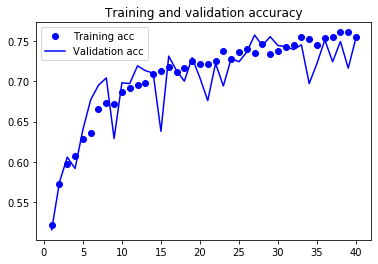

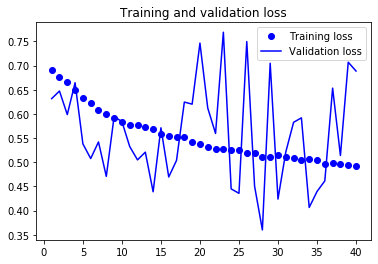

In [33]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()